# 1.1 - Regresion Lineal (ing. carac.)

**Ecuacion de la recta**

$$y = m·x+b$$

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

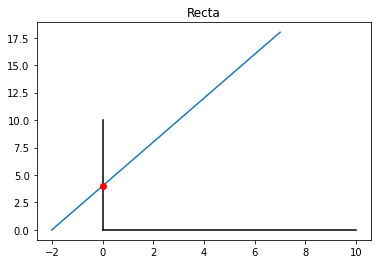

In [2]:
x=[i for i in range(-2, 8)]

m=2
b=4

y=[m*x+b for x in x]

plt.plot(x, y)
plt.plot([0,0], [0,10], color='black')
plt.plot([0,10], [0,0], color='black')
plt.plot(0, b, 'ro')
plt.title('Recta');

**Generalizacion de la ecuacion de la recta**

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente: $\beta = (X^{T}X)^{-1}X^{T}Y$
+ Minimos cuadrados

In [3]:
from scipy.stats import linregress

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
auto=pd.read_csv('data/auto-mpg.csv')

auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [6]:
# y=mx+b , mpg=m*acceleration + b

x=auto.acceleration

y=auto.mpg

linreg=linregress(x, y)

linreg

# lo que dice es que las millas por galon son igual a 1.2 veces la aceleracion mas 5 aprox

# pendiente=m, ordenada en el origen=b, coeficiente de determinacion, p_valor,  error estandar)

LinregressResult(slope=1.191204529350227, intercept=4.969793004253916, rvalue=0.42028891210165076, pvalue=1.8230915350787203e-18, stderr=0.12923643283101394)

In [7]:
R2=linreg[2]**2

R2

0.17664276963558911

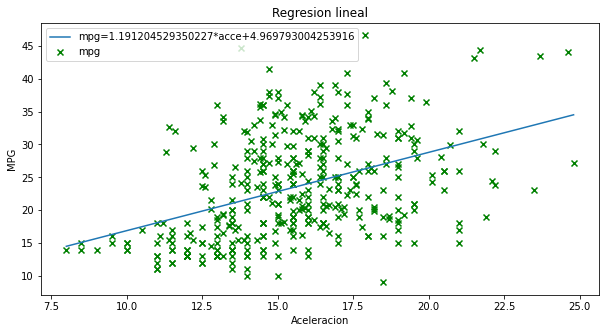

In [8]:
# plot

x=np.linspace(auto.acceleration.min(), auto.acceleration.max(), 50)
y=linreg[0]*x + linreg[1]

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='mpg={}*acce+{}'.format(linreg[0], linreg[1]))
plt.scatter(auto.acceleration, auto.mpg, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('MPG')
plt.legend()
plt.show();

In [9]:
# linreg con statsmodels

import warnings
warnings.simplefilter('ignore')


x=sm.add_constant(auto.acceleration)

y=auto.mpg

modelo=sm.OLS(y, x).fit()

In [10]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.82e-18
Time:                        09:30:18   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
pred=modelo.predict(x)

pred[:10] # ahora predigo, es decir, dame la aceleracion del coche y te digo mas menos lo que consume

0    19.264247
1    18.668645
2    18.073043
3    19.264247
4    17.477441
5    16.881838
6    15.690634
7    15.095032
8    16.881838
9    15.095032
dtype: float64

In [15]:
y[:10]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
6    14.0
7    14.0
8    14.0
9    15.0
Name: mpg, dtype: float64

In [22]:
# varias variables

x=sm.add_constant(auto[[
    'acceleration',
    'cylinders',
    'weight',
    'horse_power',
    'model_year',
    'displacement'
]].apply(lambda x: x.fillna(x.mean()))

)

y=auto.mpg

modelo=sm.OLS(y, x).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     275.5
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          4.76e-137
Time:                        09:44:55   Log-Likelihood:                -1053.5
No. Observations:                 398   AIC:                             2121.
Df Residuals:                     391   BIC:                             2149.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.9731      4.690     -3.193      0.002     -24.194      -5.752
acceleration     0.0915      0.099      0.922      0.357      -0.104       0.287
cylinders       -0.2524      0.331     -0.763      0.446      -0.903       0.398
weight          -0.0070      0.001    -10.577      0.000      -0.008      -0.006
horse_power      0.0024      0.013      0.184      0.854      -0.024       0.029
model_year       0.7573      0.052     14.551      0.000       0.655       0.860
displacement     0.0069      0.007      0.944      0.346      -0.008       0.021
==============================================================================
Omnibus:                       36.885   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.053
Skew:                           0.621   Prob(JB):                     4.08e-13
Kurtosis:                       4.378   Cond. No.                     8.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
modelo.params

const          -14.973101
acceleration     0.091488
cylinders       -0.252358
weight          -0.006977
horse_power      0.002442
model_year       0.757347
displacement     0.006949
dtype: float64

In [24]:
# version sklearn

!pip install scikit-learn

In [25]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score as r2

In [35]:
auto=auto.dropna()

x=auto[[
    #'acceleration',
    #'cylinders',
    'weight',
    #'horse_power',
    'model_year',
    #'displacement'
]]


y=auto.mpg

In [36]:
modelo=LinReg(fit_intercept=True).fit(x, y)

modelo

LinearRegression()

In [37]:
modelo.coef_

array([-0.00663208,  0.75731828])

In [38]:
modelo.intercept_

-14.347253017615852

In [39]:
pred=modelo.predict(x)

pred[:10]

array([15.42623483, 14.1727726 , 15.87721595, 15.89711217, 15.79099897,
        9.87518781,  9.78897083, 10.06751799,  9.31809348, 13.13153678])

In [40]:
r2(y, pred)

0.8081803058793997

In [41]:
x_new=np.array([3211, 89])

In [44]:
modelo.predict(x_new.reshape(1, -1))

array([31.75848023])

In [45]:
-0.00663208*3211 +  0.75731828*89 - 14.347253017615852

31.758465022384147

In [46]:
x_new.shape

(2,)

In [47]:
x_new.reshape(1, -1).shape

(1, 2)